# Titanic Machine Learning Challenge

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

# Importing the dataset and exploring it

In [2]:
df = os.chdir("D:\\Naveen\\Data Science\\Nuclei - Online\\Projects\\Internship Project 2")

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
dataframes = [train, test]
test_id = test["PassengerId"]

In [4]:
print(train.shape, test.shape)

(891, 12) (418, 11)


In [5]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [7]:
print(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

# Exploratory Data Analysis

In [8]:
#Checking for null values

print(train.isnull().sum())
print("-----------------------------")
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
-----------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


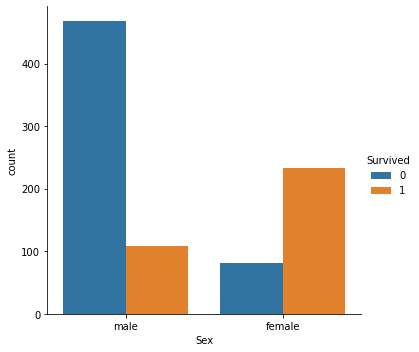

In [9]:
#Checking correlation between variables

sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = train)

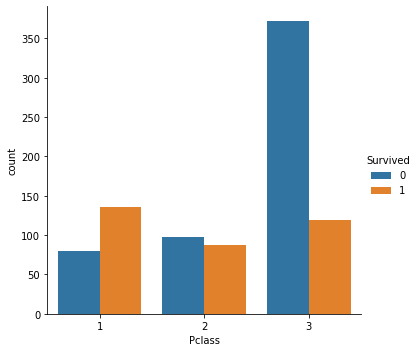

In [10]:
# We can see that females survived. We will check other variables are related

sns.catplot(x ="Pclass", hue ="Survived",kind ="count", data = train)

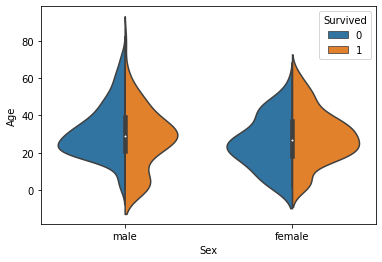

In [11]:
# Age also plays a major role in survival - we will check the age range for survival

sns.violinplot(x ="Sex", y ="Age", hue ="Survived", data = train, split = True)

In [12]:
#We will check the relation between the family members and survival rate
#the total of parents, children and siblings is family
#Adding total family members

for data in dataframes:
    data['Fam_mem'] = data['SibSp'] + data['Parch']

    # Creating a variable alone to check if they have any family or not

    data['Alone'] = data['Fam_mem'].map(lambda x: 1 if int(x) == 0 else 0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fam_mem,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


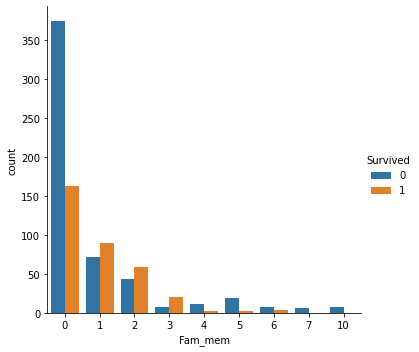

In [13]:
sns.catplot(x ="Fam_mem", hue ="Survived",kind ="count", data = train)

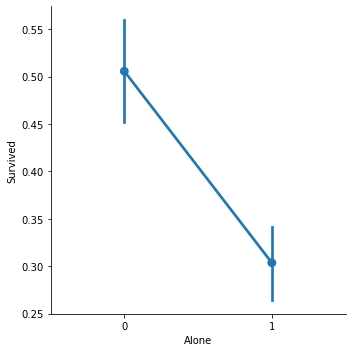

In [14]:
sns.factorplot(x ='Alone', y ='Survived', data = train) 

The above graphs show that the survival rates of a passenger who is alone and people with family members more than 5 are less

In [15]:
# The fare paid can also be an important factor in survival as first class passengers had more survival rate
# We have to make the number of fares into 3 broader groups as the classes

for data in dataframes:
    data['Fare_groups'] = pd.qcut(data['Fare'], 3) 
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fam_mem,Alone,Fare_groups
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,"(-0.001, 8.662]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,"(26.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,"(-0.001, 8.662]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,"(26.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,"(-0.001, 8.662]"


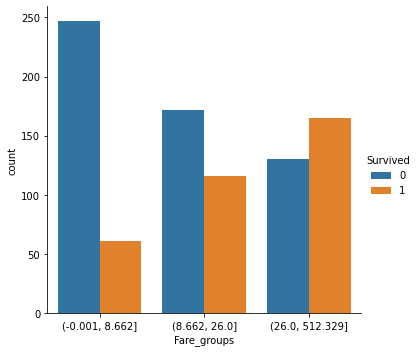

In [16]:
sns.catplot(x ="Fare_groups", hue ="Survived",kind ="count", data = train)

We can see that as the fare increased survivors increased

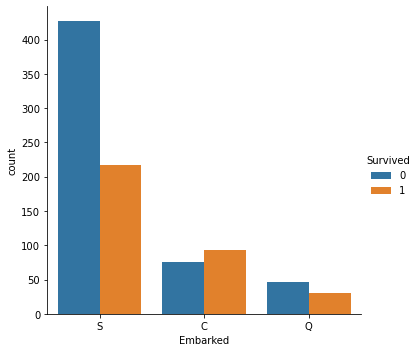

In [17]:
#We can check how the embarked place is related with survival

sns.catplot(x ="Embarked", hue ="Survived",kind ="count", data = train)

**Data Cleaning**

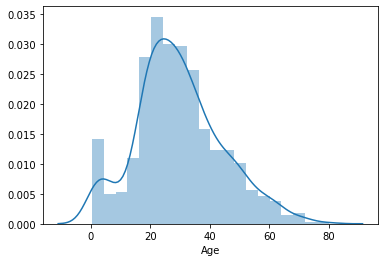

In [18]:
#We can see that there are missing values for age, and fare has one missing value.
#We have to check how age is distributed

sns.distplot(train['Age'])
plt.show()

In [19]:
#Age is normally distributed - we can use mean or median

for data in dataframes:
    data['Age'] = data['Age'].fillna(data['Age'].median())

#Only one value missing for Fare and fare groups

    data['Fare'] = data['Fare'].fillna(data['Fare'].median())
    data['Fare_groups'] = data['Fare_groups'].fillna(data['Fare_groups'].mode()[0])

print(train.info())
print("--------------------------------")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Fam_mem      891 non-null    int64   
 13  Alone        891 non-null    int64   
 14  Fare_groups  891 non-null    category
dtypes: category(1), float64(2), int64(7), object(5)
memory usage: 98.6+ KB
None
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

In [20]:
#Embarked has two missing values. Filling it with mode

for data in dataframes:
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

print(train.info())
print("--------------------------------")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  Fam_mem      891 non-null    int64   
 13  Alone        891 non-null    int64   
 14  Fare_groups  891 non-null    category
dtypes: category(1), float64(2), int64(7), object(5)
memory usage: 98.6+ KB
None
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

**Feature Engineering**

In [21]:
#Since there are 3 categories in Embarked we can transform it to numerical values

from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

for data in dataframes:
    data['Embarked_New'] = lab_enc.fit_transform(data['Embarked'])

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fam_mem,Alone,Fare_groups,Embarked_New
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,"(-0.001, 8.662]",2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,"(26.0, 512.329]",0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,"(-0.001, 8.662]",2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,"(26.0, 512.329]",2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,"(-0.001, 8.662]",2


In [22]:
#Checking the names there are many titles, so we will split it 

for data in dataframes:
    data['Title'] = data['Name'].str.split(', ', expand=True)[1].str.split('. ', expand=True)[0]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fam_mem,Alone,Fare_groups,Embarked_New,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,"(-0.001, 8.662]",2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,"(26.0, 512.329]",0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,"(-0.001, 8.662]",2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,"(26.0, 512.329]",2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,"(-0.001, 8.662]",2,Mr


In [23]:
print(train['Title'].value_counts())
print("________________________________")
print(test['Title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Sir           1
th            1
Mme           1
Capt          1
Lady          1
Ms            1
Don           1
Jonkheer      1
Name: Title, dtype: int64
________________________________
Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64


In [24]:
#We will now group all the titles into major categories

for data in dataframes:
    data['Mr'] = data['Title'].map(lambda x: 1 if str(x) == 'Mr' else 0)
    data['Miss'] = data['Title'].map(lambda x: 1 if str(x) in ['Miss', 'Mlle', 'Ms'] else 0)
    data['Mrs'] = data['Title'].map(lambda x: 1 if str(x) in ['Mrs', 'Mme'] else 0)
    data['Master'] = data['Title'].map(lambda x: 1 if str(x) == 'Master' else 0)
    data['Officer'] = data['Title'].map(lambda x: 1 if str(x) in ['Dr', 'Major', 'Rev', 'Col', 'Capt'] else 0)
    data['Royalty'] = data['Title'].map(lambda x: 1 if str(x) not in ['Mr', 'Miss', 'Mlle', 
                                                                      'Mrs', 'Ms', 'Mme', 
                                                                      'Master', 'Dr', 'Major', 'Rev', 'Col', 'Capt'] else 0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Alone,Fare_groups,Embarked_New,Title,Mr,Miss,Mrs,Master,Officer,Royalty
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,"(-0.001, 8.662]",2,Mr,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,"(26.0, 512.329]",0,Mrs,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,"(-0.001, 8.662]",2,Miss,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,"(26.0, 512.329]",2,Mrs,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,"(-0.001, 8.662]",2,Mr,1,0,0,0,0,0


In [25]:
# Changing Male and female to binary

for data in dataframes:
    data['Sex'] = data['Sex'].map(lambda x: 0 if str(x) == 'male' else 1)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Alone,Fare_groups,Embarked_New,Title,Mr,Miss,Mrs,Master,Officer,Royalty
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,"(-0.001, 8.662]",2,Mr,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,0,"(26.0, 512.329]",0,Mrs,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,1,"(-0.001, 8.662]",2,Miss,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,0,"(26.0, 512.329]",2,Mrs,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,1,"(-0.001, 8.662]",2,Mr,1,0,0,0,0,0


In [26]:
#We have to standardise age and fare

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

for data in dataframes:
    data[['Age', 'Fare']] = ss.fit_transform(data[['Age', 'Fare']])

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Alone,Fare_groups,Embarked_New,Title,Mr,Miss,Mrs,Master,Officer,Royalty
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.565736,1,0,A/5 21171,-0.502445,...,0,"(-0.001, 8.662]",2,Mr,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.663861,1,0,PC 17599,0.786845,...,0,"(26.0, 512.329]",0,Mrs,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.258337,0,0,STON/O2. 3101282,-0.488854,...,1,"(-0.001, 8.662]",2,Miss,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.433312,1,0,113803,0.420730,...,0,"(26.0, 512.329]",2,Mrs,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",0,0.433312,0,0,373450,-0.486337,...,1,"(-0.001, 8.662]",2,Mr,1,0,0,0,0,0


### Dropping unwanted columns

In [27]:
print(train.info())
print("--------------------------------")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    int64   
 5   Age           891 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Cabin         204 non-null    object  
 11  Embarked      891 non-null    object  
 12  Fam_mem       891 non-null    int64   
 13  Alone         891 non-null    int64   
 14  Fare_groups   891 non-null    category
 15  Embarked_New  891 non-null    int32   
 16  Title         891 non-null    object  
 17  Mr            891 non-null    int64   
 18  Miss      

In [28]:
for data in dataframes:
    data = data.drop(['Ticket', 'Title', 'Name', 'Cabin', 'Embarked', 'Fare_groups', 'PassengerId'], axis = 1, inplace = True)

print(train.info())
print("--------------------------------")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    int64  
 3   Age           891 non-null    float64
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Fare          891 non-null    float64
 7   Fam_mem       891 non-null    int64  
 8   Alone         891 non-null    int64  
 9   Embarked_New  891 non-null    int32  
 10  Mr            891 non-null    int64  
 11  Miss          891 non-null    int64  
 12  Mrs           891 non-null    int64  
 13  Master        891 non-null    int64  
 14  Officer       891 non-null    int64  
 15  Royalty       891 non-null    int64  
dtypes: float64(2), int32(1), int64(13)
memory usage: 108.0 KB
None
--------------------------------
<class 'pandas.core.

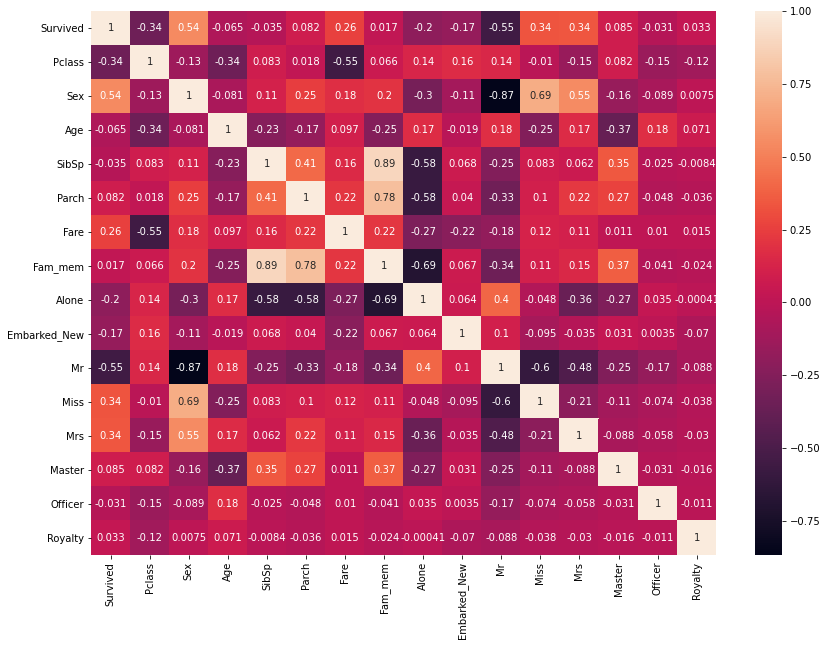

In [29]:
#now to check how all variables are related

plt.figure(figsize = (14,10))
sns.heatmap(train.corr(), annot = True)
plt.show()

# Building a Model

#### Splitting the train and test set

In [30]:
#Splitting data into dependent and independent variables

x_train = train.drop('Survived', axis = 1)
y_train = train.Survived

print(x_train.shape)
print(y_train.shape)

(891, 15)
(891,)


In [31]:
x_test = test.copy()
print(x_test.shape)

(418, 15)


#### Logisitic Regression 

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

classifier = LogisticRegression()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

acc_classifier = classifier.score(x_train, y_train)*100
acc_classifier

83.27721661054994

In [33]:
#cross validation

from sklearn.model_selection import cross_val_score
print(cross_val_score(classifier, x_train, y_train, cv=5))

[0.82122905 0.80898876 0.80337079 0.80337079 0.85955056]


#### Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)

y_pred = dec_tree.predict(x_test)

acc_dec_tree = dec_tree.score(x_train, y_train)*100
acc_dec_tree

98.20426487093154

In [35]:
#cross validation
print(cross_val_score(dec_tree, x_train, y_train, cv=5))

[0.77094972 0.78089888 0.82022472 0.73595506 0.75280899]


#### Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 3, max_features = 0.5, n_jobs = -1)
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

acc_rfc = rfc.score(x_train, y_train)*100
acc_rfc

90.12345679012346

In [37]:
#cross validation
print(cross_val_score(rfc, x_train, y_train, cv=5))

[0.83798883 0.80337079 0.87640449 0.82022472 0.84831461]


#### KNN Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

acc_knn = knn.score(x_train, y_train)*100
acc_knn

86.98092031425365

In [39]:
#cross validation
print(cross_val_score(knn, x_train, y_train, cv=5))

[0.78212291 0.76404494 0.80898876 0.79213483 0.83146067]


#### Naive Bayes Classifier

In [40]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)

acc_gnb = gnb.score(x_train, y_train)*100
acc_gnb

81.25701459034792

In [41]:
#cross validation
print(cross_val_score(gnb, x_train, y_train, cv=5))

[0.82122905 0.82022472 0.80898876 0.76404494 0.84831461]


#### Sorting according to accuracy

In [42]:
models = pd.DataFrame({
'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes'],
'Score': [acc_classifier, acc_dec_tree, acc_rfc, acc_knn, acc_gnb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Decision Tree,98.204265
2,Random Forest,90.123457
3,KNN,86.980920
0,Logistic Regression,83.277217
4,Naive Bayes,81.257015


# Submission

In [43]:
submission = pd.DataFrame({"PassengerId": test_id, "Survived": y_pred})
submission.to_csv('D:\\Naveen\\Data Science\\Nuclei - Online\\Projects\\Internship Project 2\\submission.csv', index=False)